In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.interpolate

Positions of the splines

In [2]:
C = np.array([
    [0,0],
    [1,0],
    [2,2],
    [3,2],
    [4,4],
    [5,5],
    [6,2],
    [7,1],
]).T

In [3]:
Xnew = np.linspace(-1,8,500)
spl = scipy.interpolate.CubicSpline(C[0], C[1], bc_type='natural')
Ynew = spl(Xnew)

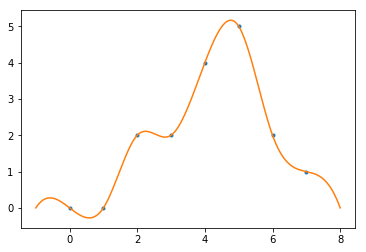

In [4]:
plt.plot(C[0],C[1], '.')
plt.plot(Xnew, Ynew)
plt.show()

In [5]:
def mkspline(x,y):
    n = len(x)-1
    output = np.empty((5,n),dtype=np.double)
    output[0] = y[:-1]
    output[4] = x[:-1]
    
    l = np.ones(n+1)
    mu = np.zeros(n+1)
    z = np.zeros(n+1)
    c = np.zeros(n+1)
        
    h = np.diff(x)
    alpha = 3/h[1:]*(y[2:]-y[1:-1]) - 3/h[:-1]*(y[1:-1]-y[:-2])

    for i in range(1,n):
        l[i] = 2*(x[i+1]-x[i-1])-h[i-1]*mu[i-1]
        mu[i] = h[i]/l[i]
        z[i] = (alpha[i-1] - h[i-1]*z[i-1])/l[i]

    for j in range(n):
        j = n-j-1
        c[j]=z[j]-mu[j]*c[j+1]
        
    output[1]=(y[1:]-y[:-1])/h - h*(c[1:]+2*c[:-1])/3
    output[3]=(c[1:]-c[:-1])/3*h
        
    output[2] = c[:-1]
    return output

$$
{\displaystyle {S}_{j}\left(x\right)=a_{j}+b_{j}\left(x-x_{j}\right)+c_{j}{\left(x-x_{j}\right)}^{2}+d_{j}{\left(x-x_{j}\right)}^{3}}
$$

In [6]:
def plotit(output, xval):
    b = np.digitize(xval, output[4])
    b = np.maximum(0, b-1)
    out = output[:,b]
    diff = xval-out[4]
    return out[0] + out[1]*diff + out[2]*diff**2 + out[3]*diff**3

In [7]:
from ipywidgets import interact
def mkC(a=0, b=0, c=3, d=2, e=4,f=5,g=2,h=1):
    C[1] = [a,b,c,d,e,f,g,h]
    plt.plot(C[0],C[1], '.')
    output = mkspline(C[0], C[1])
    plt.plot(Xnew, plotit(output, Xnew))
    plt.show()
x = (-3.,6.)
interact(mkC,a=x,b=x,c=x,d=x,e=x,f=x,g=x,h=x)

<function __main__.mkC>

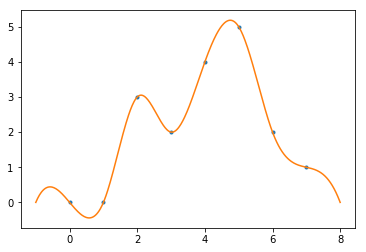

In [9]:
plt.plot(C[0],C[1], '.')
output = mkspline(C[0], C[1])
plt.plot(Xnew, plotit(output, Xnew))
plt.savefig('SplineExample.pdf', transperent=True)
plt.show()